In [1]:
import warnings
# Ignore the "deprecated" warning category
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
df = pd.read_csv("january.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309080 entries, 0 to 309079
Data columns (total 64 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YEAR                     309080 non-null  int64  
 1   MONTH                    309080 non-null  int64  
 2   OP_UNIQUE_CARRIER        309080 non-null  object 
 3   OP_CARRIER_FL_NUM        309080 non-null  int64  
 4   ORIGIN_AIRPORT_ID        309080 non-null  int64  
 5   ORIGIN                   309080 non-null  object 
 6   ORIGIN_CITY_NAME         309080 non-null  object 
 7   DEST_AIRPORT_ID          309080 non-null  int64  
 8   DEST                     309080 non-null  object 
 9   DEST_CITY_NAME           309080 non-null  object 
 10  CRS_DEP_TIME             309080 non-null  int64  
 11  DEP_TIME                 302697 non-null  float64
 12  DEP_DELAY                302697 non-null  float64
 13  DEP_DELAY_NEW            302697 non-null  float64
 14  DEP_

In [5]:
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = set()

    # Add each node of interest and its neighbors to the subgraph
    for n in nodes_of_interest:
        nodes_to_draw.add(n)
        nodes_to_draw.update(G.neighbors(n))  # Add neighbors to the subgraph nodes

    return G.subgraph(nodes_to_draw)


From the above arc plot, it is clear that there are four different color mapping for different carriers. But it is notable that only red and yellow dominated with some violet and only one green. This shows that in the complete network graph, there is something inaccurate. From the print statements, it is clear that there are 164 unique airports and 2935 unique City Pairs. The network graph is only displaying these unique pairs and their route structure.

Hence, I am creating four different network graphs for each carrier to understand the underlying patterns respectively.

In [6]:
AA = nx.DiGraph()
DL = nx.DiGraph()
UA = nx.DiGraph()
WN = nx.DiGraph()

In [7]:
for _, row in df.iterrows():
    
    origin = row['ORIGIN']
    destination = row['DEST']
    carrier_name = row['OP_UNIQUE_CARRIER']
    trips = row['FLIGHTS']

    if row['OP_UNIQUE_CARRIER'] == 'AA':
        AA.add_node(origin, Carrier = carrier_name)
        AA.add_node(destination, Carrier = carrier_name)
        
        if AA.has_edge(origin, destination):
            AA[origin][destination]['weight'] += trips

        else:
            AA.add_edge(origin, destination, Carrier = carrier_name, weight=trips)

    elif row['OP_UNIQUE_CARRIER'] == 'DL':
        DL.add_node(origin, Carrier = carrier_name)
        DL.add_node(destination, Carrier = carrier_name)

        if DL.has_edge(origin, destination):
            DL[origin][destination]['weight'] += trips

        else:
            DL.add_edge(origin, destination, Carrier = carrier_name, weight=trips)
       

    elif row['OP_UNIQUE_CARRIER'] == 'UA':
        UA.add_node(origin, Carrier = carrier_name)
        UA.add_node(destination, Carrier = carrier_name)
        
        if UA.has_edge(origin, destination):
            UA[origin][destination]['weight'] += trips

        else:
            UA.add_edge(origin, destination, Carrier = carrier_name, weight=trips)

    else:
        WN.add_node(origin, Carrier = carrier_name)
        WN.add_node(destination, Carrier = carrier_name)
        
        if WN.has_edge(origin, destination):
            WN[origin][destination]['weight'] += trips

        else:
            WN.add_edge(origin, destination, Carrier = carrier_name, weight=trips)
    

In [8]:
print("Number of nodes in AA:", len(AA.nodes))
print("Number of edges in AA:", len(AA.edges))

Number of nodes in AA: 102
Number of edges in AA: 722


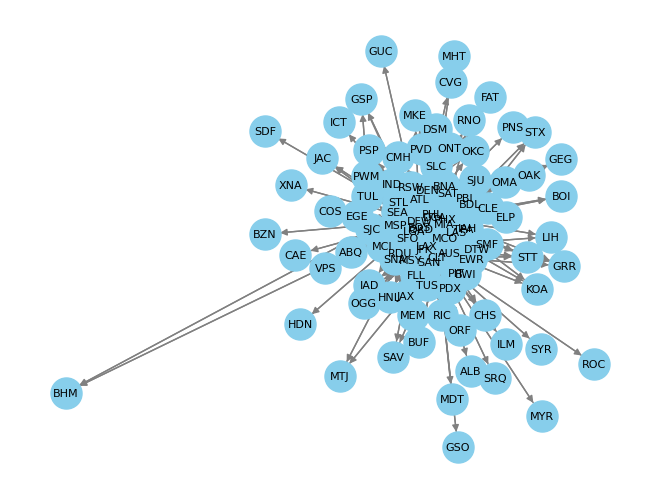

In [9]:
nx.draw(AA, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500, font_size=8)
plt.show()

In [10]:
deg_AA = nx.degree_centrality(AA)

In [11]:
print("Number of nodes in DL:", len(DL.nodes))
print("Number of edges in DL:", len(DL.edges))

Number of nodes in DL: 145
Number of edges in DL: 834


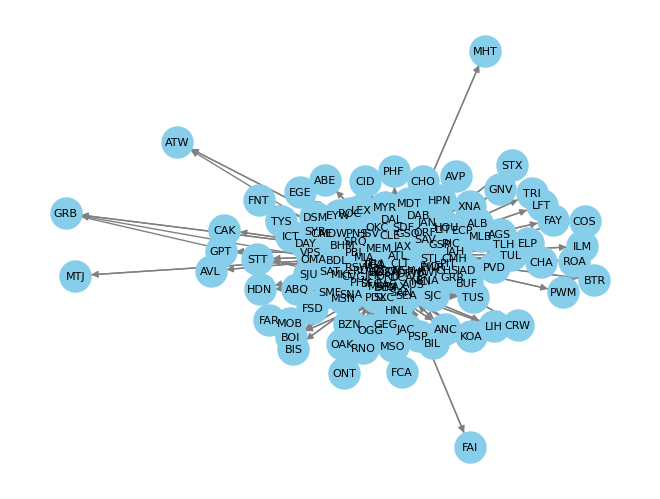

In [12]:
nx.draw(DL, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500, font_size=8)
plt.show()

In [13]:
deg_DL = nx.degree_centrality(DL)

In [14]:
print("Number of nodes in UA:", len(UA.nodes))
print("Number of edges in UA:", len(UA.edges))

Number of nodes in UA: 108
Number of edges in UA: 717


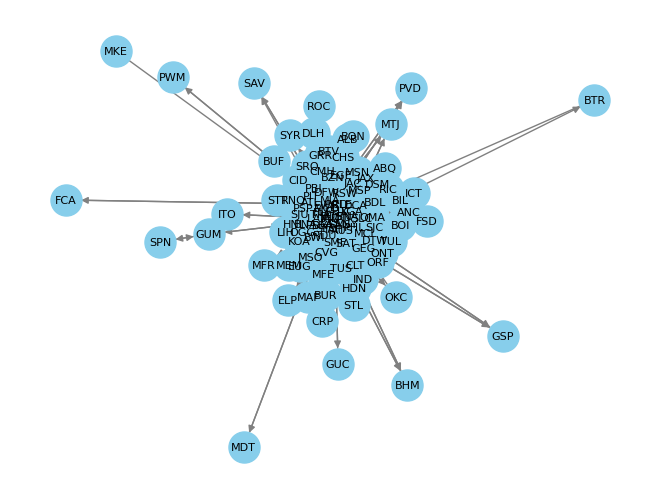

In [15]:
nx.draw(UA, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500, font_size=8)
plt.show()

In [16]:
deg_UA = nx.degree_centrality(UA)

In [17]:
print("Number of nodes in WN:", len(WN.nodes))
print("Number of edges in WN:", len(WN.edges))

Number of nodes in WN: 85
Number of edges in WN: 1378


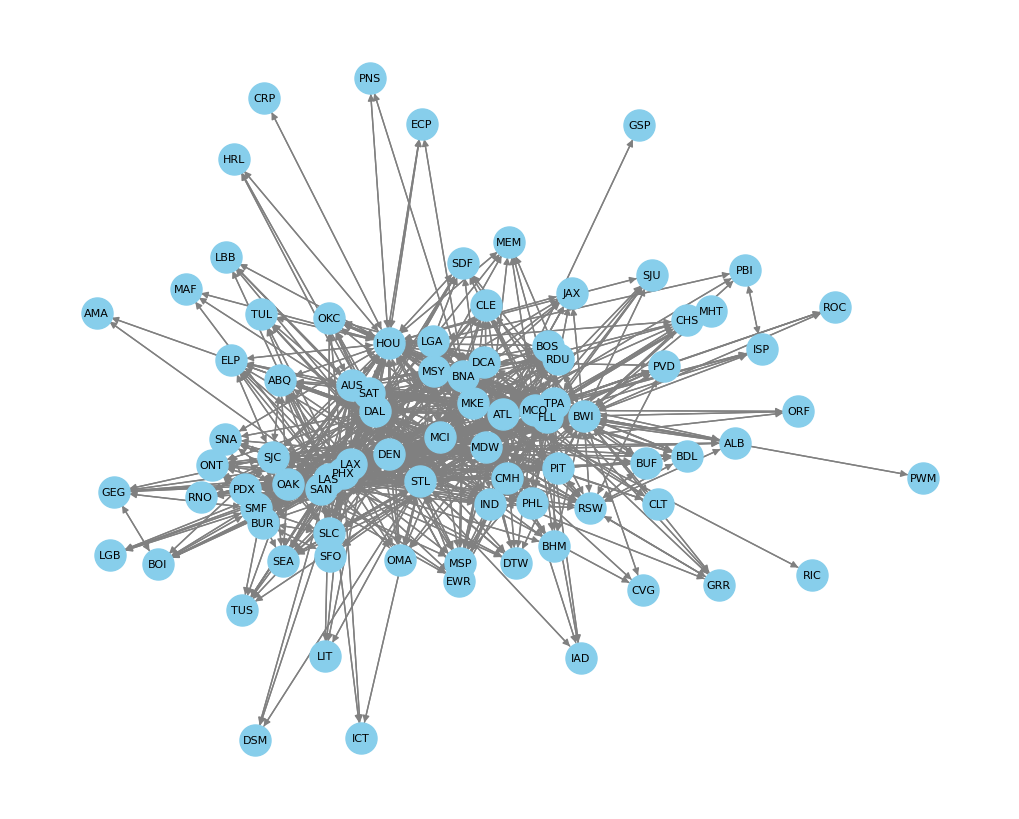

In [18]:
plt.figure(figsize=(10, 8))
nx.draw(WN, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500, font_size=8)
plt.show()

From the network graph, we can say that multiple nodes look interconnected at the center. It doesn't look like hub-spoke like the other three network graphs with a star graphs. We can look into the degree_centrality of the SouthWest to see if there is or are any particular important nodes.

In [19]:
deg_WN = nx.degree_centrality(WN)

From the values of degree centrality, we can say that multiple airports have similar values. We can interpret this as those airports having higher values have more traffic and hence more routes are connected with them.

In [20]:
max_wn = max(deg_WN.values())
imp_wn = [n for n,d in deg_WN.items() if d == max_wn]
imp_wn

['DEN']

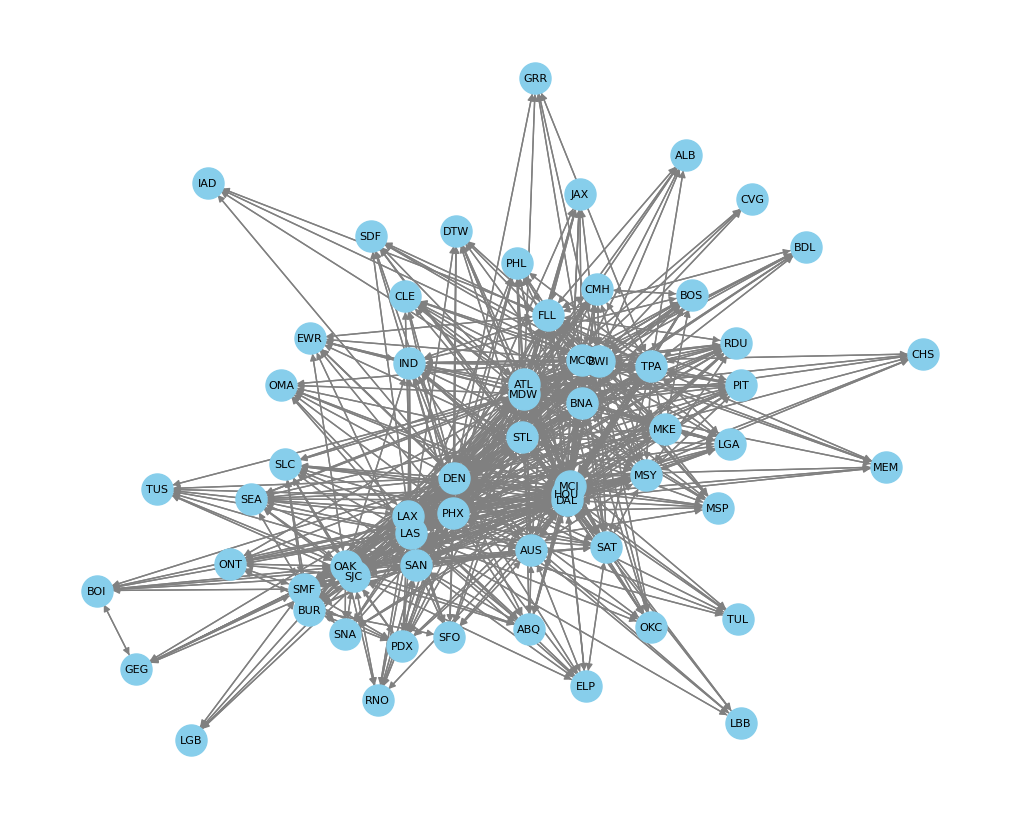

In [21]:
WN_imp = get_nodes_and_nbrs(WN,imp_wn)
plt.figure(figsize=(10, 8))
nx.draw(WN_imp, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500, font_size=8)
plt.show()

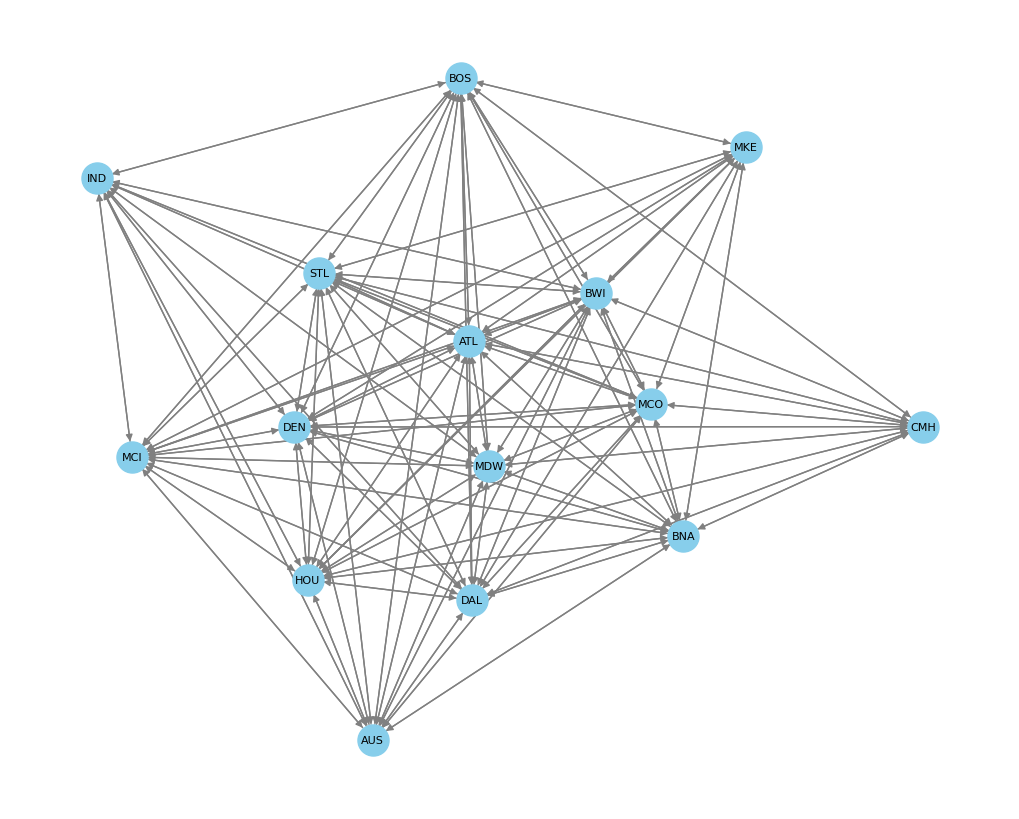

In [22]:
node = ['BOS']
WN_route = get_nodes_and_nbrs(WN,node)
plt.figure(figsize=(10, 8))
nx.draw(WN_route, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500, font_size=8)
plt.show()

'BOS' is one of the nodes that has a lower degree of centrality. I've chosen it to display the underlying network with less number of neighbor nodes. From, this it is clear that they are interconnected to each other. These nodes are forming Cliques or Communities clearly unlike the hub-n-spoke where subgraphs might be an open network.

Using the concept of maximal cliques, we can try creating a recommendation system in which airports can be joined to the network. For example, in the case of any three citys that are forming a open traingle, a recommendation can be made to join the open traingle by connecting the edge.

## Betweenness Centrality

In [23]:
bet_AA = nx.betweenness_centrality(AA)

In [24]:
centrality_AA = pd.DataFrame({
    'Degree Centrality': deg_AA,
    'Betweenness Centrality': bet_AA
})
centrality_AA = centrality_AA.sort_values(
    by='Degree Centrality', 
    ascending=False
)
centrality_AA.head(10)

,Degree Centrality,Betweenness Centrality
DFW,1.722772,0.513241
CLT,1.287129,0.265092
ORD,1.000000,0.066508
PHX,0.950495,0.088152
PHL,0.772277,0.053351
MIA,0.712871,0.029666
LAX,0.633663,0.026989
JFK,0.316832,0.003759
DCA,0.316832,0.001446
LGA,0.198020,0.000615


In [25]:
bet_DL = nx.betweenness_centrality(DL)

centrality_DL = pd.DataFrame({
    'Degree Centrality': deg_DL,
    'Betweenness Centrality': bet_DL
})
centrality_DL = centrality_DL.sort_values(
    by='Degree Centrality', 
    ascending=False
)
centrality_DL.head(10)

,Degree Centrality,Betweenness Centrality
ATL,1.805556,0.757290
MSP,0.951389,0.125392
SLC,0.722222,0.077594
DTW,0.687500,0.035743
LAX,0.458333,0.025607
JFK,0.444444,0.011440
SEA,0.437500,0.042134
BOS,0.250000,0.001110
CVG,0.208333,0.000728
LGA,0.208333,0.001415


In [26]:
bet_UA = nx.betweenness_centrality(UA)

centrality_UA = pd.DataFrame({
    'Degree Centrality': deg_UA,
    'Betweenness Centrality': bet_UA
})
centrality_UA = centrality_UA.sort_values(
    by='Degree Centrality', 
    ascending=False
)
centrality_UA.head(10)

,Degree Centrality,Betweenness Centrality
DEN,1.336449,0.284525
ORD,1.327103,0.264428
IAH,1.177570,0.222370
EWR,0.990654,0.149832
SFO,0.943925,0.111625
IAD,0.654206,0.036561
LAX,0.373832,0.026774
LAS,0.299065,0.001959
CLE,0.168224,0.000300
FLL,0.149533,0.000047


In [27]:
bet_WN = nx.betweenness_centrality(WN)

centrality_WN = pd.DataFrame({
    'Degree Centrality': deg_WN,
    'Betweenness Centrality': bet_WN
})
centrality_WN = centrality_WN.sort_values(
    by='Degree Centrality', 
    ascending=False
)
centrality_WN.head(10)

,Degree Centrality,Betweenness Centrality
DEN,1.428571,0.095731
DAL,1.404762,0.097442
MDW,1.404762,0.084622
LAS,1.309524,0.087827
BWI,1.285714,0.106798
PHX,1.214286,0.054254
HOU,1.214286,0.090879
MCO,1.142857,0.057511
STL,1.047619,0.036137
BNA,0.904762,0.027083


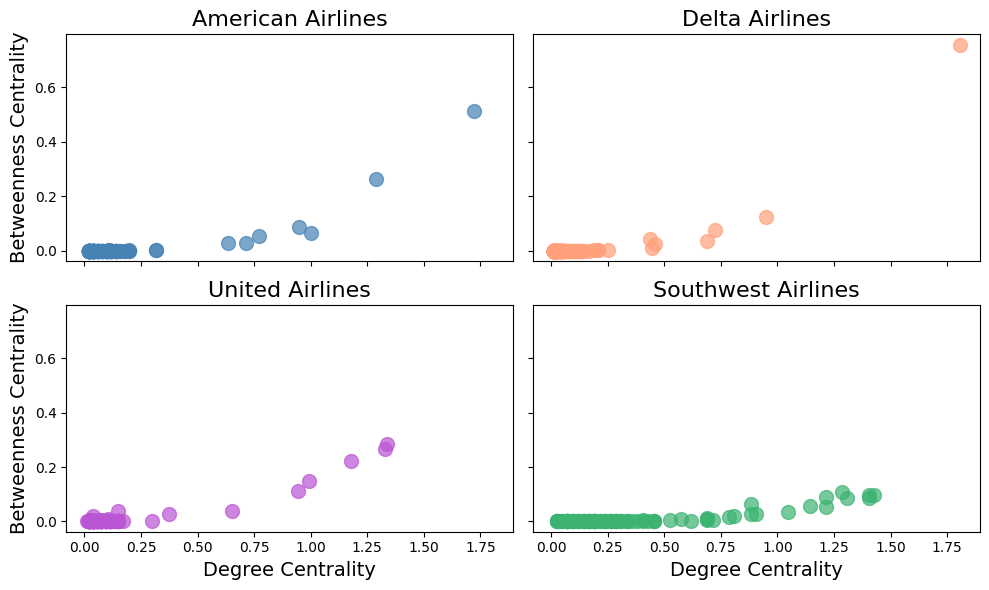

In [28]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10, 6))

ax1.scatter(centrality_AA["Degree Centrality"],centrality_AA["Betweenness Centrality"],
           s=100, c='#4682B4', alpha=0.7)
ax1.set_title("American Airlines",fontsize=16)

ax2.scatter(centrality_DL["Degree Centrality"],centrality_DL["Betweenness Centrality"],
           s=100, c='#FFA07A', alpha=0.7)
ax2.set_title("Delta Airlines",fontsize=16)

ax3.scatter(centrality_UA["Degree Centrality"],centrality_UA["Betweenness Centrality"],
           s=100, c='#BA55D3', alpha=0.7)
ax3.set_title("United Airlines",fontsize=16)

ax4.scatter(centrality_WN["Degree Centrality"],centrality_WN["Betweenness Centrality"],
           s=100, c='#3CB371', alpha=0.7)
ax4.set_title("Southwest Airlines",fontsize=16)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel("Degree Centrality", fontsize=14)
    ax.set_ylabel("Betweenness Centrality", fontsize=14)
    ax.label_outer()

plt.tight_layout()
plt.show()

#### High Degree + High Betweenness Centrality -> Strong candidate for a major hub. 
#### High Betweenness, Lower Degree -> Likely a regional hub or a critical transit point, even if it doesn’t have the most direct connections.

## Closeness Centrality

In [29]:
close_AA = nx.closeness_centrality(AA)
centrality_AA['Closeness Centrality'] = pd.Series(close_AA)
centrality_AA.head(10)

,Degree Centrality,Betweenness Centrality,Closeness Centrality
DFW,1.722772,0.513241,0.878261
CLT,1.287129,0.265092,0.737226
ORD,1.000000,0.066508,0.668874
PHX,0.950495,0.088152,0.655844
PHL,0.772277,0.053351,0.619632
MIA,0.712871,0.029666,0.608434
LAX,0.633663,0.026989,0.594118
JFK,0.316832,0.003759,0.540107
DCA,0.316832,0.001446,0.543011
LGA,0.198020,0.000615,0.523316


In [30]:
close_DL = nx.closeness_centrality(DL)
centrality_DL['Closeness Centrality'] = pd.Series(close_DL)
centrality_DL.head(10)

,Degree Centrality,Betweenness Centrality,Closeness Centrality
ATL,1.805556,0.757290,0.911392
MSP,0.951389,0.125392,0.657534
SLC,0.722222,0.077594,0.610169
DTW,0.687500,0.035743,0.602510
LAX,0.458333,0.025607,0.564706
JFK,0.444444,0.011440,0.562500
SEA,0.437500,0.042134,0.562500
BOS,0.250000,0.001110,0.533333
CVG,0.208333,0.000728,0.527473
LGA,0.208333,0.001415,0.516129


In [31]:
close_UA = nx.closeness_centrality(UA)
centrality_UA['Closeness Centrality'] = pd.Series(close_UA)
centrality_UA.head(10)

,Degree Centrality,Betweenness Centrality,Closeness Centrality
DEN,1.336449,0.284525,0.748252
ORD,1.327103,0.264428,0.748252
IAH,1.177570,0.222370,0.694805
EWR,0.990654,0.149832,0.664596
SFO,0.943925,0.111625,0.648485
IAD,0.654206,0.036561,0.591160
LAX,0.373832,0.026774,0.545918
LAS,0.299065,0.001959,0.529703
CLE,0.168224,0.000300,0.511962
FLL,0.149533,0.000047,0.507109


In [32]:
close_WN = nx.closeness_centrality(WN)
centrality_WN['Closeness Centrality'] = pd.Series(close_WN)
centrality_WN.head(10)

,Degree Centrality,Betweenness Centrality,Closeness Centrality
DEN,1.428571,0.095731,0.777778
DAL,1.404762,0.097442,0.770642
MDW,1.404762,0.084622,0.770642
LAS,1.309524,0.087827,0.743363
BWI,1.285714,0.106798,0.736842
PHX,1.214286,0.054254,0.717949
HOU,1.214286,0.090879,0.717949
MCO,1.142857,0.057511,0.700000
STL,1.047619,0.036137,0.677419
BNA,0.904762,0.027083,0.646154


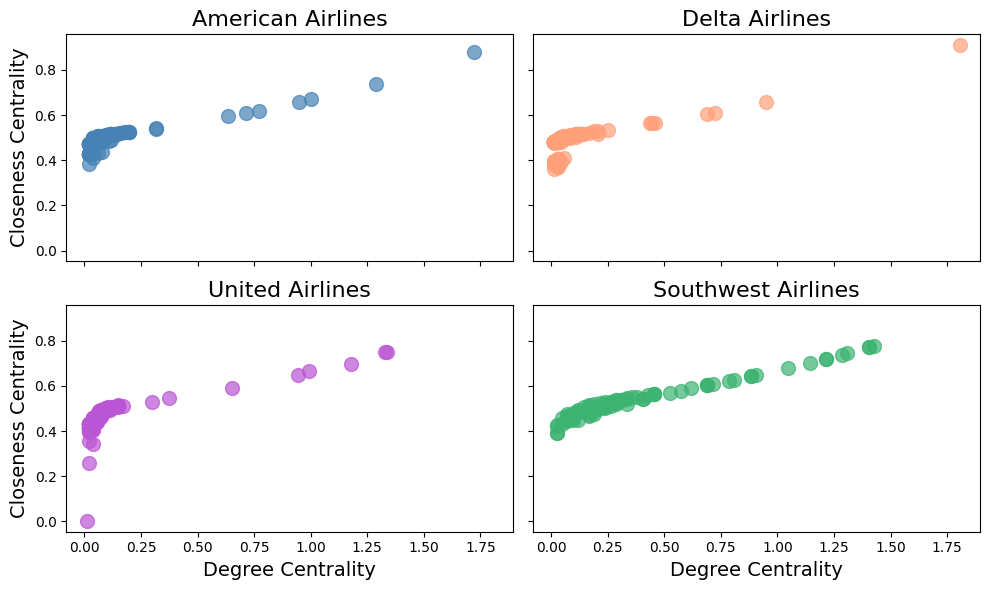

In [33]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10, 6))

ax1.scatter(centrality_AA["Degree Centrality"],centrality_AA["Closeness Centrality"],
           s=100, c='#4682B4', alpha=0.7)
ax1.set_title("American Airlines",fontsize=16)

ax2.scatter(centrality_DL["Degree Centrality"],centrality_DL["Closeness Centrality"],
           s=100, c='#FFA07A', alpha=0.7)
ax2.set_title("Delta Airlines",fontsize=16)

ax3.scatter(centrality_UA["Degree Centrality"],centrality_UA["Closeness Centrality"],
           s=100, c='#BA55D3', alpha=0.7)
ax3.set_title("United Airlines",fontsize=16)

ax4.scatter(centrality_WN["Degree Centrality"],centrality_WN["Closeness Centrality"],
           s=100, c='#3CB371', alpha=0.7)
ax4.set_title("Southwest Airlines",fontsize=16)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel("Degree Centrality", fontsize=14)
    ax.set_ylabel("Closeness Centrality", fontsize=14)
    ax.label_outer()

plt.tight_layout()
plt.show()

#### Closeness = Measures the average shortest path from a node to all other nodes, indicating how quickly it can reach the rest of the network.(Efficient Path)
#### High Degree, High Closeness -> a major hub, critical for both direct connections and network efficiency(provides efficient routes)
#### High Degree, Low Closeness -> a regional hub, airport with many flights to regional airports but fewer or less efficient paths to distant destinations.
#### Low Degree, High Closeness -> A critical transit point, even though it has limited direct connections.
#### Low Degree, Low Closeness -> Peripheral node (Not connected)

## Eigen Vector Centrality

In [34]:
eigen_AA = nx.eigenvector_centrality(AA)
centrality_AA['Eigen Vector Centrality'] = pd.Series(eigen_AA)
centrality_AA.head(10)

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigen Vector Centrality
DFW,1.722772,0.513241,0.878261,0.358076
CLT,1.287129,0.265092,0.737226,0.317693
ORD,1.000000,0.066508,0.668874,0.301547
PHX,0.950495,0.088152,0.655844,0.270662
PHL,0.772277,0.053351,0.619632,0.252991
MIA,0.712871,0.029666,0.608434,0.250079
LAX,0.633663,0.026989,0.594118,0.224689
JFK,0.316832,0.003759,0.540107,0.152014
DCA,0.316832,0.001446,0.543011,0.161102
LGA,0.198020,0.000615,0.523316,0.112732


In [35]:
eigen_DL = nx.eigenvector_centrality(DL)
centrality_DL['Eigen Vector Centrality'] = pd.Series(eigen_DL)
centrality_DL.head(10)

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigen Vector Centrality
ATL,1.805556,0.757290,0.911392,0.393214
MSP,0.951389,0.125392,0.657534,0.325111
SLC,0.722222,0.077594,0.610169,0.276329
DTW,0.687500,0.035743,0.602510,0.274285
LAX,0.458333,0.025607,0.564706,0.219813
JFK,0.444444,0.011440,0.562500,0.216381
SEA,0.437500,0.042134,0.562500,0.208434
BOS,0.250000,0.001110,0.533333,0.167687
CVG,0.208333,0.000728,0.527473,0.137492
LGA,0.208333,0.001415,0.516129,0.114545


In [36]:
eigen_UA = nx.eigenvector_centrality(UA)
centrality_UA['Eigen Vector Centrality'] = pd.Series(eigen_UA)
centrality_UA.head(10)

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigen Vector Centrality
DEN,1.336449,0.284525,0.748252,0.337344
ORD,1.327103,0.264428,0.748252,0.343656
IAH,1.177570,0.222370,0.694805,0.312418
EWR,0.990654,0.149832,0.664596,0.291120
SFO,0.943925,0.111625,0.648485,0.285073
IAD,0.654206,0.036561,0.591160,0.235433
LAX,0.373832,0.026774,0.545918,0.168774
LAS,0.299065,0.001959,0.529703,0.159267
CLE,0.168224,0.000300,0.511962,0.111360
FLL,0.149533,0.000047,0.507109,0.113224


In [37]:
eigen_WN = nx.eigenvector_centrality(WN)
centrality_WN['Eigen Vector Centrality'] = pd.Series(eigen_WN)
centrality_WN.head(10)

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigen Vector Centrality
DEN,1.428571,0.095731,0.777778,0.235965
DAL,1.404762,0.097442,0.770642,0.233489
MDW,1.404762,0.084622,0.770642,0.234011
LAS,1.309524,0.087827,0.743363,0.219166
BWI,1.285714,0.106798,0.736842,0.213824
PHX,1.214286,0.054254,0.717949,0.217286
HOU,1.214286,0.090879,0.717949,0.211213
MCO,1.142857,0.057511,0.700000,0.199511
STL,1.047619,0.036137,0.677419,0.203275
BNA,0.904762,0.027083,0.646154,0.184316


In [38]:
centrality_WN.tail(10)

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigen Vector Centrality
HRL,0.071429,0.000000,0.451613,0.022019
ORF,0.071429,0.000000,0.456522,0.023600
CVG,0.071429,0.000000,0.477273,0.024929
ROC,0.071429,0.000008,0.444444,0.021206
AMA,0.047619,0.000000,0.456522,0.016502
PNS,0.047619,0.000000,0.432990,0.014420
RIC,0.023810,0.000000,0.392523,0.006593
GSP,0.023810,0.000000,0.392523,0.006593
PWM,0.023810,0.000000,0.426396,0.007795
CRP,0.023810,0.000000,0.420000,0.007700


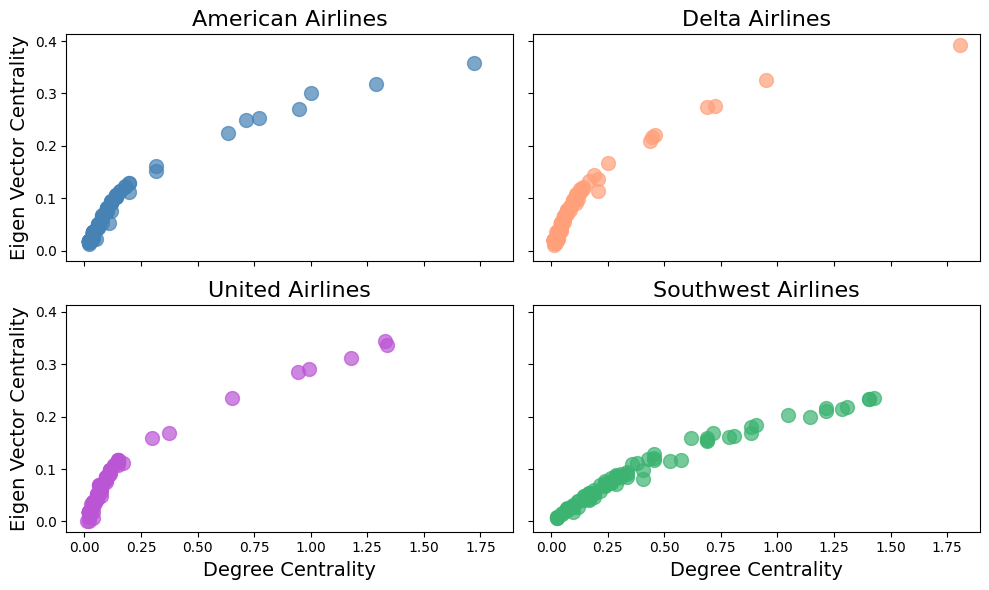

In [39]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10, 6))

ax1.scatter(centrality_AA["Degree Centrality"],centrality_AA["Eigen Vector Centrality"],
           s=100, c='#4682B4', alpha=0.7)
ax1.set_title("American Airlines",fontsize=16)

ax2.scatter(centrality_DL["Degree Centrality"],centrality_DL["Eigen Vector Centrality"],
           s=100, c='#FFA07A', alpha=0.7)
ax2.set_title("Delta Airlines",fontsize=16)

ax3.scatter(centrality_UA["Degree Centrality"],centrality_UA["Eigen Vector Centrality"],
           s=100, c='#BA55D3', alpha=0.7)
ax3.set_title("United Airlines",fontsize=16)

ax4.scatter(centrality_WN["Degree Centrality"],centrality_WN["Eigen Vector Centrality"],
           s=100, c='#3CB371', alpha=0.7)
ax4.set_title("Southwest Airlines",fontsize=16)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel("Degree Centrality", fontsize=14)
    ax.set_ylabel("Eigen Vector Centrality", fontsize=14)
    ax.label_outer()

plt.tight_layout()
plt.show()

#### Eigen Vector Centrality = High eigenvector centrality implies that a node is connected to other important nodes, which enhances its importance even if it doesn’t have the highest degree centrality.
#### High Degree, High Eigenvector -> a major hub, such an airport would be a key transit point, not only due to its direct routes but also due to its strategic connections to other main hubs
#### High Degree, Low Eigenvector -> regional hub, an airport that serves numerous routes but primarily to lower-traffic airports, making it significant locally but less influential overall
####  Low Degree, High Eigenvector -> Strategic link or Specialized Hub, despite having limited direct routes, connects to major hubs.
#### Low Degree, Low Eigenvector -> isolated node

## Transitivity

In [40]:
nx.transitivity(AA)

0.2006638777737359

In [41]:
nx.transitivity(DL)

0.14586475615887382

In [42]:
nx.transitivity(UA)

0.17770786516853931

In [43]:
nx.transitivity(WN)

0.4489815298418878

#### Having a high transitivity number shows that there are a lot of interconnected nodes, which means A is connected to B and C, and B is also connected to C, in other words, it is a triangle relation. From the above results, we can see that Southwest has a higher number which indicates that airports are interconnected unlike hub and spoke. And so, legacy carriers have less transitivity number.

## Ego Centric Network

### American Airlines

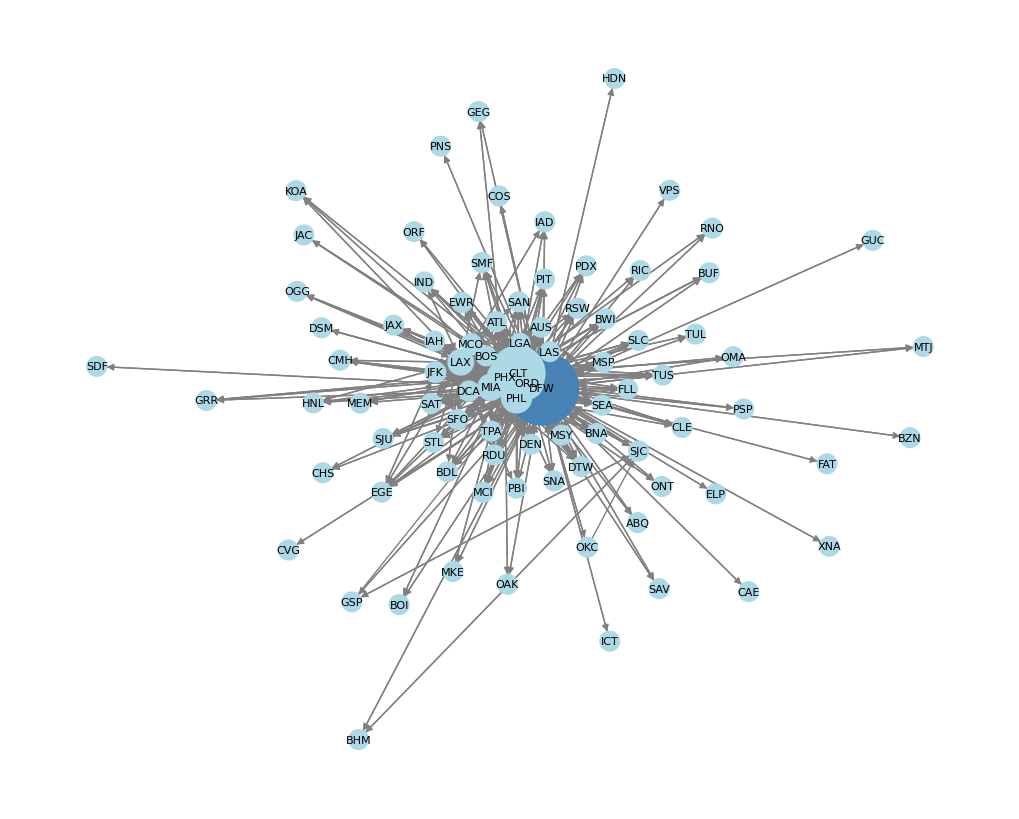

In [44]:
ego_graph = nx.ego_graph(AA, 'DFW')

node_sizes = [(bet_AA.get(node, 0) * 5000) + 200 for node in ego_graph.nodes()]

node_colors = [
    '#4682B4' if node == 'DFW' else 'lightblue'  
    for node in ego_graph.nodes()
]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(ego_graph,k=2)  # Positioning the nodes
nx.draw(ego_graph, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=8,
        font_color='black', edge_color='gray')
plt.show()

### Delta Airlines

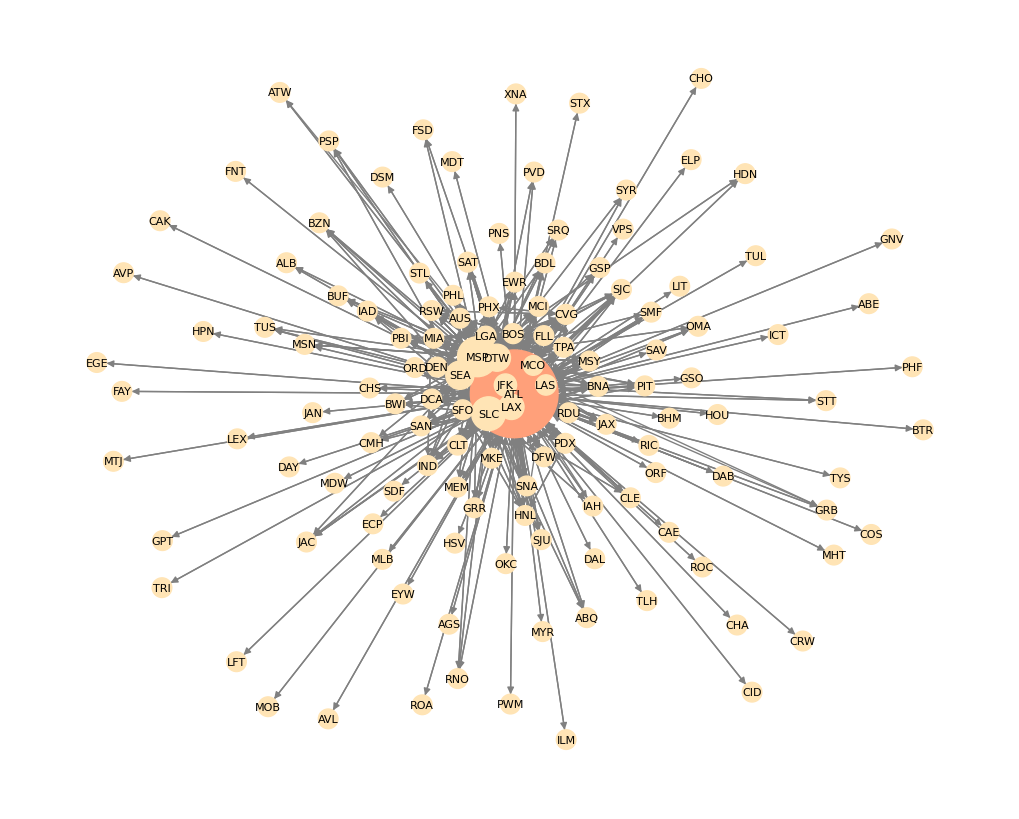

In [45]:
ego_graph = nx.ego_graph(DL, 'ATL')

node_sizes = [(bet_DL.get(node, 0) * 5000) + 200 for node in ego_graph.nodes()]

node_colors = [
    '#FFA07A' if node == 'ATL' else '#FFE4B5'  
    for node in ego_graph.nodes()
]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(ego_graph,k=2)  # Positioning the nodes
nx.draw(ego_graph, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=8, font_color='black', edge_color='gray')
plt.show()

### United Airlines

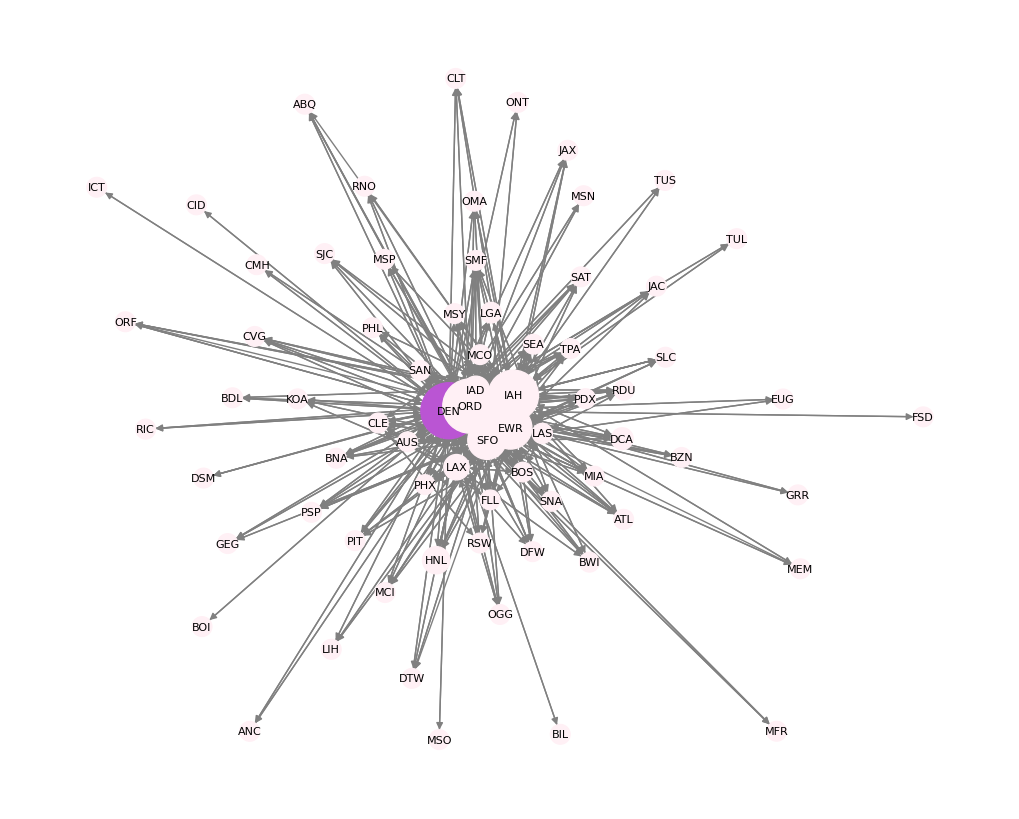

In [46]:
ego_graph = nx.ego_graph(UA, 'DEN')

node_sizes = [(bet_UA.get(node, 0) * 5000) + 200 for node in ego_graph.nodes()]

node_colors = [
    '#BA55D3' if node == 'DEN' else '#FFF0F5' 
    for node in ego_graph.nodes()
]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(ego_graph,k=2)  # Positioning the nodes
nx.draw(ego_graph, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=8, font_color='black', edge_color='gray')
plt.show()

### Southwest Airlines

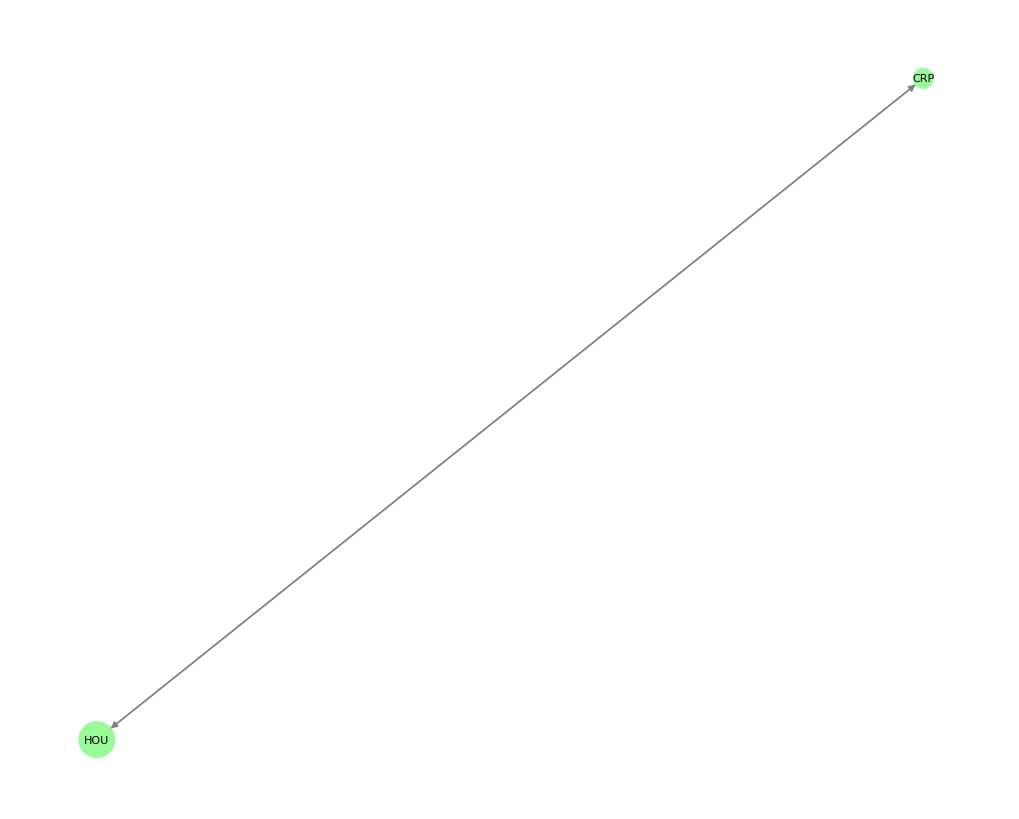

In [52]:
ego_graph = nx.ego_graph(WN, 'CRP')

node_sizes = [(bet_WN.get(node, 0) * 5000) + 200 for node in ego_graph.nodes()]


plt.figure(figsize=(10, 8))
pos = nx.spring_layout(ego_graph,k=1)  # Positioning the nodes
nx.draw(ego_graph, pos, with_labels=True, node_color='#98FB98', node_size=node_sizes, font_size=8, font_color='black', edge_color='gray')
plt.show()

## Community Detection 
### Girvan–Newman

In [48]:
from networkx.algorithms import community
#import community as community_louvain

communities = community.girvan_newman(WN)
 
node_groups = []
for com in next(communities):
  node_groups.append(list(com))
 
print(node_groups)

[['ABQ', 'BOS', 'DCA', 'RIC', 'GRR', 'AMA', 'PHL', 'TUS', 'MAF', 'LGB', 'PVD', 'EWR', 'MEM', 'ECP', 'FLL', 'BUF', 'CLT', 'DSM', 'OAK', 'SLC', 'ELP', 'MDW', 'STL', 'PHX', 'RNO', 'MSP', 'MCO', 'GEG', 'CRP', 'RDU', 'BDL', 'SJC', 'SAT', 'ONT', 'DAL', 'CVG', 'OKC', 'BWI', 'SMF', 'GSP', 'DTW', 'LAS', 'ORF', 'LAX', 'ROC', 'BOI', 'SJU', 'DEN', 'MKE', 'MHT', 'TPA', 'CMH', 'SNA', 'LBB', 'SDF', 'BHM', 'IAD', 'BNA', 'AUS', 'OMA', 'HRL', 'PBI', 'RSW', 'ICT', 'JAX', 'LGA', 'PDX', 'ALB', 'PIT', 'BUR', 'TUL', 'PNS', 'SEA', 'ATL', 'CLE', 'MCI', 'SAN', 'MSY', 'ISP', 'CHS', 'LIT', 'SFO', 'HOU', 'IND'], ['PWM']]


1


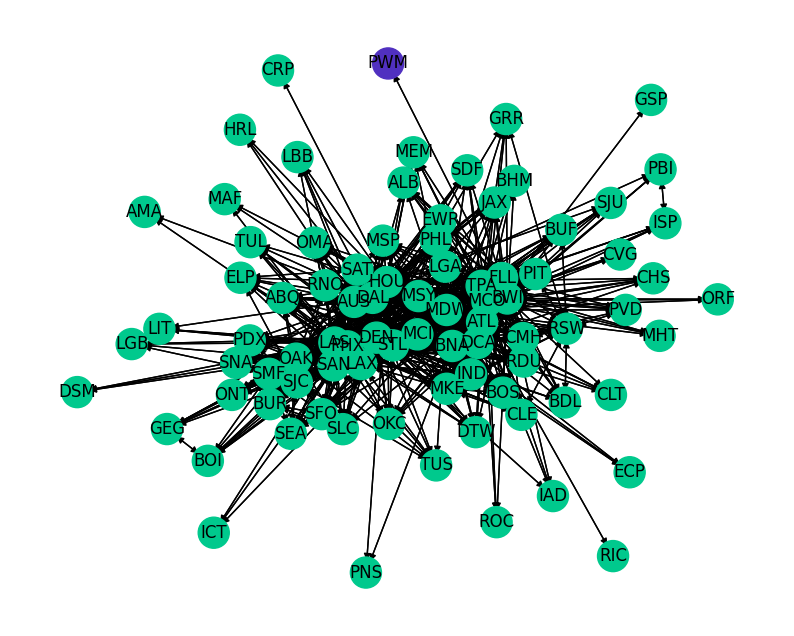

In [49]:
plt.figure(figsize=(10, 8))
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(WN, k=2)
lst_b = community.girvan_newman(WN)
color_map_b = {}
keys = WN.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for x in lst_b:
  print(1)
  for c in x:
    for n in c:
      #print(n,counter)
      color_map_b[n] = colors[counter]
    counter = counter + 1
  break
nx.draw_networkx_edges(WN, pos)
nx.draw_networkx_nodes(WN, pos, node_color=dict(color_map_b).values(), node_size = 500)
nx.draw_networkx_labels(WN, pos)
plt.axis("off")
plt.show()

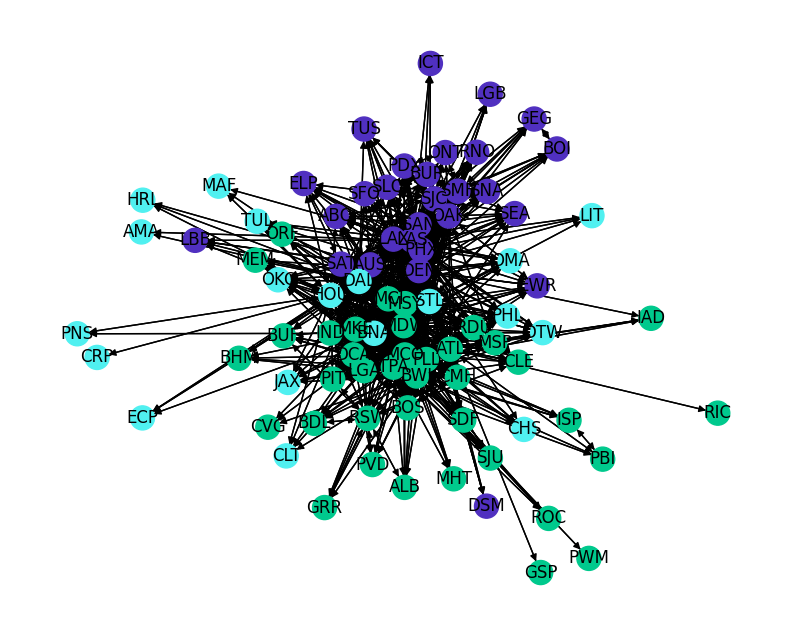

In [50]:
plt.figure(figsize=(10, 8))

lst_b = community.greedy_modularity_communities(WN)

#Community visualization
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(WN, k=1)

color_map_b = {}
keys = WN.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for x in lst_b:
  for n in x:
    color_map_b[n] = colors[counter]
  counter = counter + 1

nx.draw_networkx_edges(WN, pos)
nx.draw_networkx_nodes(WN, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(WN, pos)
plt.axis("off")
plt.show()

In [51]:
centrality_DL.tail(10)

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigen Vector Centrality
STX,0.013889,0.0,0.478405,0.020662
TLH,0.013889,0.0,0.478405,0.020662
TUL,0.013889,0.0,0.478405,0.020662
FAI,0.013889,0.0,0.360902,0.010953
FAR,0.013889,0.0,0.397790,0.017084
XNA,0.013889,0.0,0.478405,0.020662
TYS,0.013889,0.0,0.478405,0.020662
VPS,0.013889,0.0,0.478405,0.020662
BIS,0.013889,0.0,0.397790,0.017084
ONT,0.013889,0.0,0.379947,0.014520
